# Image Read

- cv2.IMREAD_COLOR: colorful image
- cv2.IMREAD_GRAYSTYLE: gray image

In [1]:
import cv2 # Note that color format of OpenCV is BGR here.
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

img = cv2.imread('test1.jpg')

In [2]:
img

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [223, 203, 185],
        [224, 204, 186],
        [225, 205, 187]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [225, 206, 185],
        [225, 205, 187],
        [227, 208, 187]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 209, 186],
        [230, 209, 188],
        [231, 210, 188]],

       ...,

       [[249, 249, 255],
        [249, 249, 255],
        [248, 251, 255],
        ...,
        [ 44,  38,  57],
        [159, 152, 173],
        [163, 155, 178]],

       [[249, 249, 255],
        [249, 249, 255],
        [249, 249, 255],
        ...,
        [ 37,  31,  50],
        [ 41,  34,  55],
        [ 70,  62,  85]],

       [[249, 249, 255],
        [249, 249, 255],
        [249, 249, 255],
        ...,
        [204, 198, 217],
        [200, 193, 214],
        [ 43,  35,  58]]

In [3]:
# Display the image. Multiple windows can be created as well.
cv2.imshow('image',img)
# Wait for some time (in milliseconds). 0 means wait for any key input.
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/srcres/.conda/envs/opencv-learn/lib/python3.12/site-packages/cv2/qt/plugins"
QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0

In [4]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
img.shape

(300, 300, 3)

In [6]:
img = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[254, 254, 254, ..., 200, 201, 202],
       [254, 254, 254, ..., 202, 202, 204],
       [254, 254, 254, ..., 204, 205, 206],
       ...,
       [251, 251, 252, ...,  44, 159, 163],
       [251, 251, 251, ...,  37,  41,  70],
       [251, 251, 251, ..., 204, 200,  43]], dtype=uint8)

In [7]:
img.shape

(300, 300)

In [8]:
# Display the image. Multiple windows can be created as well.
cv2.imshow('image',img)
# Wait for some time (in milliseconds). 0 means wait for any key input.
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is n

In [ ]:
# Save
if not os.path.exists('run'):
    os.mkdir('run')
cv2.imwrite('run/myimg.jpg',img)

In [ ]:
type(img)

In [ ]:
img.size

In [ ]:
img.dtype

# Video Read

- cv2.VideoCapture can be used to capture video contents from cameras. Use numbers to control different devices, e.g. 0 or 1.
- If video file is needed, just specify the path.

In [9]:
vc = cv2.VideoCapture('run/test_modified.avi')

In [10]:
# Check if it's correctly opened.
if vc.isOpened():
    open_, frame = vc.read()
else:
    open_ = False

In [11]:
while open_:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
vc.release()
cv2.destroyAllWindows()

# Cut out some image data

In [12]:
img = cv2.imread('test1.jpg')
cat = img[0:100, 0:100]
cv_show('cat', cat)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is n

# Color channel extract

In [13]:
b, g, r = cv2.split(img)

In [14]:
b

array([[254, 254, 254, ..., 223, 224, 225],
       [254, 254, 254, ..., 225, 225, 227],
       [254, 254, 254, ..., 227, 230, 231],
       ...,
       [249, 249, 248, ...,  44, 159, 163],
       [249, 249, 249, ...,  37,  41,  70],
       [249, 249, 249, ..., 204, 200,  43]], dtype=uint8)

In [15]:
b.shape

(300, 300)

In [16]:
img = cv2.merge((b, g, r))
img.shape

(300, 300, 3)

In [17]:
# Only reserve R
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 1] = 0
cv_show('R', cur_img)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is n

In [18]:
# Only reserve G
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 2] = 0
cv_show('G', cur_img)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is n

In [19]:
# Only reserve B
cur_img = img.copy()
cur_img[:, :, 1] = 0
cur_img[:, :, 2] = 0
cv_show('B', cur_img)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is n

# Border filling

In [20]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

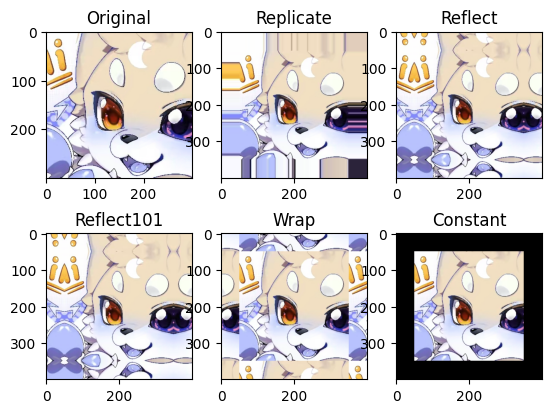

In [21]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('Replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('Reflect')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('Reflect101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('Wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('Constant')

plt.show()

- BORDER_REPLICATE
- BORDER_REFLECT: fedcba|abcdefgh|hgfedcb
- BORDER_REFLECT_101: gfedcb|abcdefgh|gfedcba
- BORDER_WRAP: cdefgh|abcdefgh|abcdefg
- BORDER_CONSTANT

# Value calculating

In [22]:
img1 = cv2.imread('test1.jpg')
img2 = cv2.imread('test2.jpg')

In [23]:
img1_1 = img1 + 10
img1[:5, :, 0]

array([[254, 254, 254, ..., 223, 224, 225],
       [254, 254, 254, ..., 225, 225, 227],
       [254, 254, 254, ..., 227, 230, 231],
       [254, 254, 254, ..., 229, 232, 231],
       [254, 254, 254, ..., 230, 233, 233]], dtype=uint8)

In [24]:
img1_1[:5, :, 0]

array([[  8,   8,   8, ..., 233, 234, 235],
       [  8,   8,   8, ..., 235, 235, 237],
       [  8,   8,   8, ..., 237, 240, 241],
       [  8,   8,   8, ..., 239, 242, 241],
       [  8,   8,   8, ..., 240, 243, 243]], dtype=uint8)

In [25]:
# equivalent to `% 256`
(img1 + img1_1)[:5, :, 0]

array([[  6,   6,   6, ..., 200, 202, 204],
       [  6,   6,   6, ..., 204, 204, 208],
       [  6,   6,   6, ..., 208, 214, 216],
       [  6,   6,   6, ..., 212, 218, 216],
       [  6,   6,   6, ..., 214, 220, 220]], dtype=uint8)

In [26]:
cv2.add(img1, img1_1)[:5, :, 0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# Image blending

In [27]:
img1 + img2

ValueError: operands could not be broadcast together with shapes (300,300,3) (960,720,3) 

In [28]:
img1.shape

(300, 300, 3)

In [29]:
img2 = cv2.resize(img2, (300, 300))
img2.shape

(300, 300, 3)

In [30]:
res = cv2.addWeighted(img1, 0.4, img2, 0.6, 0)

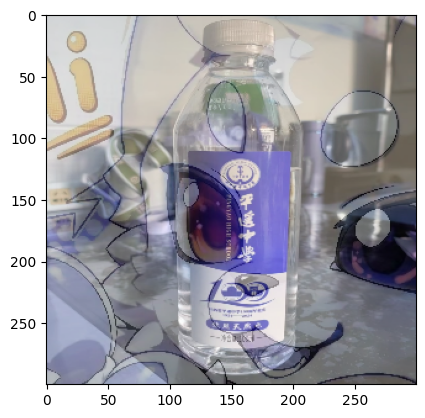

In [31]:
plt.imshow(res)

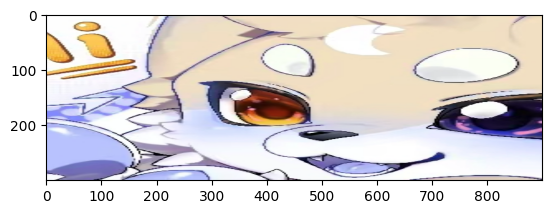

In [32]:
res = cv2.resize(img1, (0, 0), fx=3, fy=1)
plt.imshow(res)

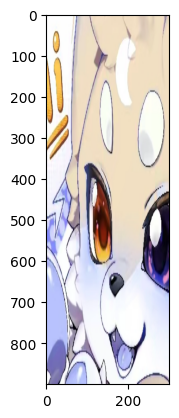

In [33]:
res = cv2.resize(img1, (0, 0), fx=1, fy=3)
plt.imshow(res)

# Image thresholding

ret, dst = cv2.threshold(src, thresh, maxval, type)

- src: The input image. Only single-channel image is allowed, gray image as usual.
- dst: The output image.
- thresh: The thresholding value.
- maxval: When the pixel value is over the thresholding value (or smaller than, depending on type), this value is given.
- type: Binary operation type. The following 5 types are included: cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV.
- cv2.THRESH_BINARY: maxval for portion exceeding thresh, otherwise 0
- cv2.THRESH_BINARY_INV: inverse of THRESH_BINARY
- cv2.THRESH_TRUNC: set to thresh for portion exceeding thresh, otherwise no change
- cv2.THRESH_TOZERO: no change for portion exceeding thresh, otherwise 0
- cv2.THRESH_TOZERO_INV: inverse of THRESH_TOZERO

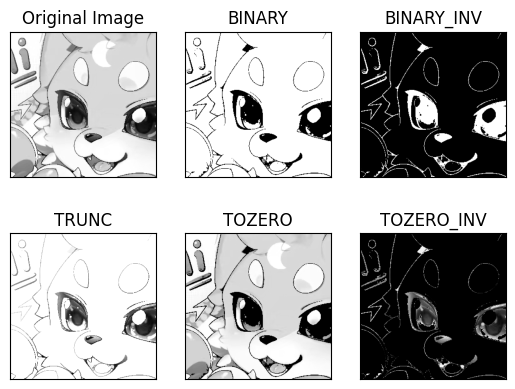

In [34]:
img_gray = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)

ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

# Image smoothing

In [2]:
img = cv2.imread('test3.jpg')

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/srcres/.conda/envs/opencv-learn/lib/python3.12/site-packages/cv2/qt/plugins"
QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not t

In [6]:
# average filtration
# simple average convolution operation
blur = cv2.blur(img, (3, 3))

cv2.imshow('blur', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [7]:
# box filtration
# Similar to averaging, normalizing is optional.
box = cv2.boxFilter(img, -1, (3, 3), normalize=True)

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [39]:
# box filtration
# Similar to averaging, normalizing is optional. Easy to exceed the border.
box = cv2.boxFilter(img, -1, (3, 3), normalize=False)

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is not the object's thread (0x2fdcdcd0).
Cannot move to target thread (0x2fafd8f0)

QObject::moveToThread: Current thread (0x2fafd8f0) is n

In [3]:
# Gauss filtration
# The value of the convolution kernel within gauss blur meets requirements of Gauss distribution, meaning the middle portion is considered more.

gaussian = cv2.GaussianBlur(img, (5, 5), 1)

cv2.imshow('gaussian', gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [4]:
# mid-value filtration
# equivalent to replacement with mid-value

median = cv2.medianBlur(img, 5)

cv2.imshow('median', median)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [8]:
# display all of above

res = np.hstack((blur, gaussian, median))
cv2.imshow('median vs average', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

# Morphology - eroding operation

In [9]:
img = cv2.imread('test4.jpg')

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [15]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [11]:
pie = cv2.imread('pie.png')

cv2.imshow('pie', pie)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [16]:
kernel = np.ones((30, 30), np.uint8)
erosion_1 = cv2.erode(pie, kernel, iterations=1)
erosion_2 = cv2.erode(pie, kernel, iterations=2)
erosion_3 = cv2.erode(pie, kernel, iterations=3)
res = np.hstack((erosion_1, erosion_2, erosion_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

# Morphology - dilating operation

In [17]:
img = cv2.imread('test4.jpg')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [18]:
kernel = np.ones((3, 3), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=3)

cv2.imshow('img_erosion', img_erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [19]:
kernel = np.ones((3, 3), np.uint8)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=3)

cv2.imshow('img_dilation', img_dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [20]:
pie = cv2.imread('pie.png')

kernel = np.ones((30, 30), np.uint8)
dilate_1 = cv2.dilate(pie, kernel, iterations=1)
dilate_2 = cv2.dilate(pie, kernel, iterations=2)
dilate_3 = cv2.dilate(pie, kernel, iterations=3)
res = np.hstack((dilate_1, dilate_2, dilate_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

# Opening calculation and closing calculation

In [21]:
# opening calculation, erode first, then dilate
img = cv2.imread('test4.jpg')

kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('opening', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [22]:
 # closing calculation, dilate first, then erode
img = cv2.imread('test4.jpg')

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow('closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

# Gradient calculation

In [23]:
# gradient = erosion - dilation
pie = cv2.imread('pie.png')
kernel = np.ones((7, 7), np.uint8)
dilate = cv2.dilate(pie, kernel, iterations=5)
erosion = cv2.erode(dilate, kernel, iterations=5)

res = np.hstack((dilate, erosion))

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [24]:
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

# Tophat vs blackhat

- tophat = original input - opening calculation result
- blackhat = closed calculation result - original input

In [25]:
# tophat
img = cv2.imread('test4.jpg')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
cv2.imshow('tophat', tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread

In [26]:
# blackhat
img = cv2.imread('test4.jpg')
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
cv2.imshow('blackhat', blackhat)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread (0x44a2c70).
Cannot move to target thread (0x42775c0)

QObject::moveToThread: Current thread (0x42775c0) is not the object's thread